## SVM

In [1]:
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve, ShuffleSplit, validation_curve
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from category_encoders.one_hot import OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from mlxtend.evaluate import bias_variance_decomp
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler

from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import average_precision_score

In [2]:
def my_learn_curve(title="some title", 
                   estimator=None, 
                   cv = None ,
                   X=None,
                   y=None,
                   label_suffix =  None,
                   color_= [],
                   shape='o-'):
    plt.title(title)
    plt.ylim(0.0, 1.01)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=4,
                       train_sizes=np.linspace(.1, 1.0, 10),
                       return_times=True)
    train_scores_mean =  1.0 - np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean =  1.0 - np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)


    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes,  train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes,  test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.plot(train_sizes, train_scores_mean, shape, color=color_[0],
                 label="Training Error - {}".format(label_suffix))
    plt.plot(train_sizes, test_scores_mean,shape, color=color_[1],
                 label="Cross-validation Error - {}".format(label_suffix))
    plt.legend(loc="best")
    plt.ylabel("Error")
    return plt

In [28]:
SVC?

In [3]:
parent_dir = '/mnt/c/users/17752/Documents/GeorgiaTech/machine_learning'

# Liver Data 

In [30]:
cross_val_score?

In [47]:
parent_dir = '/mnt/c/users/17752/Documents/GeorgiaTech/machine_learning'
liver_df = pd.read_csv(f"{parent_dir}/data/liver.csv")
liver_df = pd.read_csv(f"{parent_dir}/data/liver.csv")
liver_df.drop_duplicates(inplace=True)
impute_Albumin_and_Globulin_Ratio = liver_df[~liver_df.Albumin_and_Globulin_Ratio.isna()].Albumin_and_Globulin_Ratio.mean()
filt_ =  liver_df.Albumin_and_Globulin_Ratio.isna()
liver_df.loc[filt_, "Albumin_and_Globulin_Ratio" ]= impute_Albumin_and_Globulin_Ratio
assert sum(liver_df.Albumin_and_Globulin_Ratio.isna()) == 0 
# format response 
liver_df.loc[(liver_df.Dataset ==2), "Dataset" ] = -1
liver_df.head(10)
liver_df.loc[:,"Gender"] = pd.get_dummies(liver_df.Gender, prefix='gender').drop("gender_Male", axis =1  ).gender_Female
X = liver_df.loc[:, "Age":"Albumin_and_Globulin_Ratio"]
y = liver_df["Dataset"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=62)

#('over', SMOTE(sampling_strategy="minority")
#inital shot 
liver_steps = [[('scaler', StandardScaler()),
               ("model",  SVC(gamma='scale',kernel='rbf', cache_size=10000))],
               [('scaler', StandardScaler()),
               ("model",  SVC(gamma='scale',kernel='linear', cache_size=10000, probability=True)) ]]
liver_pipeline_linear = Pipeline(steps=liver_steps[1])
liver_pipeline_rbf =  Pipeline(steps=liver_steps[0])
stratified_kfold = StratifiedKFold(n_splits = 10, random_state=42, shuffle=True)
scores = cross_val_score(liver_pipeline_linear, X_train, y_train, scoring='recall', cv=stratified_kfold, n_jobs=3)


In [8]:
2+2

4

### Base learning curve 

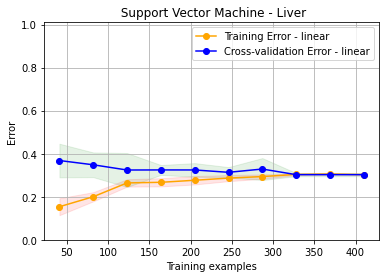

In [31]:
my_learn_curve(title=" Support Vector Machine - Liver", 
               estimator=liver_pipeline_linear, 
               cv=stratified_kfold, 
               X=X_train,
               y=y_train,
               label_suffix="linear", 
               color_=["orange","blue"],
               shape = 'o-'  )

# my_learn_curve(title=" Support Vector Machine", 
#                estimator=liver_pipeline_rbf, 
#                cv=stratified_kfold,
#                X=X_train,
#                y=y_train ,
#                label_suffix="rbf", 
#                color_=["orange","blue"], shape = 'x-' )


plt.savefig("SVM_LIVER_BASE_learning_curve.pdf")



## average_precision_score

In [25]:
print(average_precision_score(y_train, liver_pipeline_linear.fit(X_train,y_train).predict(X_train)))
print(average_precision_score( y_test, liver_pipeline_linear.fit(X_train,y_train).predict(X_test)))

0.6973684210526315
0.7719298245614035


###  Base Metrics 

In [15]:
# print(grid_result_l.best_estimator_.get_params())
print(classification_report(y_train, liver_pipeline_linear.fit(X_train,y_train).predict(X_train) ))
print(classification_report(y_test, liver_pipeline_linear.fit(X_train,y_train).predict(X_test) ))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       138
           1       0.70      1.00      0.82       318

    accuracy                           0.70       456
   macro avg       0.35      0.50      0.41       456
weighted avg       0.49      0.70      0.57       456

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        26
           1       0.77      1.00      0.87        88

    accuracy                           0.77       114
   macro avg       0.39      0.50      0.44       114
weighted avg       0.60      0.77      0.67       114



/home/flufylobster/anaconda3/envs/ML39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/flufylobster/anaconda3/envs/ML39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


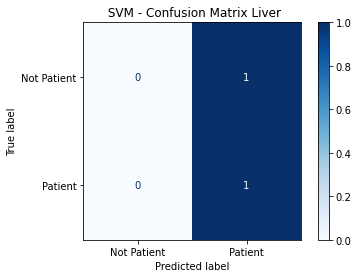

In [28]:
plot_confusion_matrix(estimator=  liver_pipeline_linear.fit(X_train,y_train), X=X_train, y_true= y_train  , 
                      cmap=plt.cm.Blues,
                       normalize="true",
                      display_labels = ["Not Patient" ,"Patient"]
                        )

plt.title(" SVM - Confusion Matrix Liver")

plt.savefig("SVM_LIVER_BASE_CONFUSION_MAT.PDF")
### Overfit 

## Validation/ complexity  Curve

In [34]:
import warnings
warnings.filterwarnings("ignore")

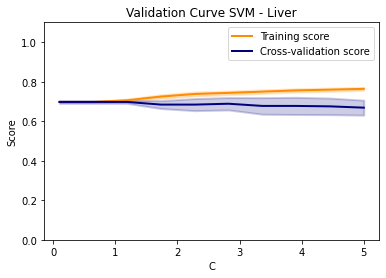

In [33]:
# cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=45)
train_scores, valid_scores = validation_curve(liver_pipeline_rbf,
                                              X_train,
                                              y_train, 
                                              param_name =  "model__C",
                                            param_range = np.linspace(0.1,5,10),
                                            cv=cv)

param_range =  np.linspace(0.1,5,10)

train_scores_mean =  np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve SVM - Liver")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
# semilogx
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")


plt.savefig("SVM_complexity_liver_C.pdf")

plt.show()

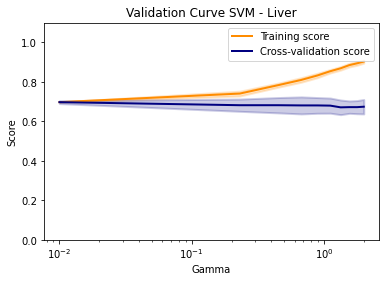

In [52]:
# cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=45)
train_scores, valid_scores = validation_curve(liver_pipeline_rbf,
                                              X_train,
                                              y_train, 
                                              param_name =  "model__gamma",
                                            param_range = np.linspace(1e-2,2.,10),
                                            cv=cv)

param_range =  np.linspace(1e-2,2.,10)

train_scores_mean =  np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve SVM - Liver")
plt.xlabel("Gamma")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
# semilogx
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.savefig("SVM_complexity_liver_gamma.pdf")
plt.show()

## Grid Search Liver 

In [51]:
# Set the parameters by cross-validation

liver_steps =    [('scaler', StandardScaler()),("model",  SVC( cache_size=10000, probability=True))]

liver_pipeline= Pipeline(steps=liver_steps)

tuned_parameters = [{'model__kernel': ['rbf'], 'model__gamma': np.linspace(1e-2,.1,5),
                     'model__C': [ 1,2,3 ], "model__class_weight":["balanced", None]},
                    {'model__kernel': ['linear'], 'model__C': [ 1,2,3 ], "model__class_weight":["balanced", None], 
                    "model__probability":[True]}]


# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=45)
# define the grid search procedure
grid_search = GridSearchCV(estimator=liver_pipeline, param_grid=tuned_parameters, 
                           n_jobs=-1, cv=cv, 
                           scoring='average_precision')
# execute the grid search
grid_result_l = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f usin g %s" % (grid_result_l.best_score_, grid_result_l.best_params_))
# summarize all scores that were evaluated
means = grid_result_l.cv_results_['mean_test_score']
stds = grid_result_l.cv_results_['std_test_score']
params = grid_result_l.cv_results_['params']

Best: 0.885576 usin g {'model__C': 1, 'model__class_weight': 'balanced', 'model__kernel': 'linear', 'model__probability': True}


In [52]:
print(average_precision_score(y_train, liver_pipeline.fit(X_train, y_train).predict_proba(X_train)[:,1]))

0.9040576395547891


In [44]:
print(average_precision_score(y_train, grid_result_l.predict_proba(X_train)[:,1]))

0.8945287189989907


In [45]:
print(average_precision_score(y_test, grid_result_l.predict_proba(X_test)[:,1]))

0.9268875935569446


## Final learning curve liver svm

In [76]:
S

In [7]:
liver_steps_f =    [('scaler', StandardScaler()),("model", 
                                                SVC(C=1, cache_size=10000, class_weight='balanced', kernel='rbf', gamma=0.039 ),) ]

liver_pipeline_f= Pipeline(steps=liver_steps_f)

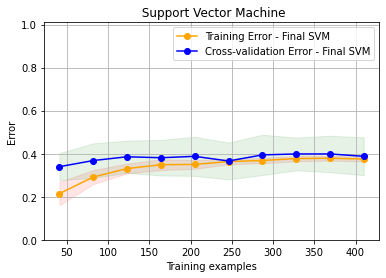

In [9]:

my_learn_curve(title=" Support Vector Machine", 
               estimator=liver_pipeline_f.fit(X_train,y_train), 
               cv=stratified_kfold, 
               X=X_train,
               y=y_train,
               label_suffix="Final SVM", 
               color_=["orange","blue"],
               shape = 'o-'  )

# my_learn_curve(title=" Support Vector Machine - Liver", 
#                estimator=liver_pipeline_linear.fit(X_train,y_train), 
#                cv=stratified_kfold,
#                X=X_train,
#                y=y_train ,
#                label_suffix="Base SVM", 
#                color_=["orange","blue"], shape = 'x-' )

plt.savefig("SVM_LIVER_FINAL_learning_curve.pdf")

# Metrics 

In [73]:
# print(grid_result_l.best_estimator_.get_params())
print(classification_report(y_train, liver_pipeline_f.fit(X_train,y_train).predict(X_train)))
print(classification_report(y_test,  liver_pipeline_f.predict(X_test) ))

              precision    recall  f1-score   support

          -1       0.44      0.92      0.60       138
           1       0.94      0.50      0.65       318

    accuracy                           0.63       456
   macro avg       0.69      0.71      0.63       456
weighted avg       0.79      0.63      0.64       456

              precision    recall  f1-score   support

          -1       0.35      0.96      0.52        26
           1       0.98      0.48      0.64        88

    accuracy                           0.59       114
   macro avg       0.66      0.72      0.58       114
weighted avg       0.83      0.59      0.61       114



Text(0.5, 1.0, ' SVM - Confusion Matrix Liver')

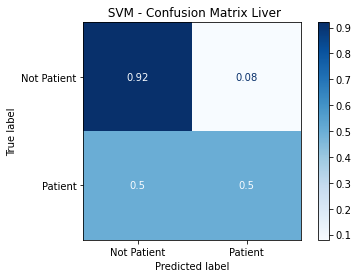

In [75]:
plot_confusion_matrix(estimator=   liver_pipeline_f.fit(X_train,y_train), X=X_train, y_true= y_train  , 
                      cmap=plt.cm.Blues,
                       normalize="true",
                      display_labels = ["Not Patient" ,"Patient"]
                        )

plt.title(" SVM - Confusion Matrix Liver")

# plt.savefig("SVM_LIVER_BASE_CONFUSION_MAT.PDF")
### Overfit 

In [51]:
print(average_precision_score(y_train, grid_result_l.predict(X_train)))
print(average_precision_score( y_test,grid_result_l.predict(X_test)))

0.8088284273460264
0.8748538011695906


## Census Data 

In [23]:
StandardScaler?

In [31]:
census_df = pd.read_csv(f"{parent_dir}/data/adult.csv")
census_df.drop_duplicates(inplace=True)
# # Deleting duplicates 
census_df.duplicated().sum()
#Replacing '?' for nans
census_df = census_df.replace('?', np.NaN)
# Mapping already our target variable in  1 and 0.
census_df.income = census_df.income.map({'<=50K':-1, '>50K':1})

train_data, test_data = train_test_split(census_df,
                                         test_size=0.2,
                                         stratify=census_df['income'],
                                         random_state=65)
print('Train data shape is {}'.format(train_data.shape))
print('Test data shape is {}'.format(test_data.shape))
X_c_train = train_data.drop('income', axis=1)
y_c_train = train_data['income']

#Transforming categorical columns
categorical_columns= X_c_train.select_dtypes(object).columns


#         ('over', SMOTE()),
# Using pipeline
census_steps =[('encoding', OneHotEncoder(cols=categorical_columns)),
         ('imputer',SimpleImputer(missing_values=np.NaN, strategy='most_frequent')),
         ('scaler', StandardScaler()),
          ('under', RandomUnderSampler(random_state=62)),
        ("model",  SVC(gamma='scale', cache_size=10000))]

census_pipeline = Pipeline(steps=census_steps)


census_steps_rbf = [('encoding', OneHotEncoder(cols=categorical_columns)),
         ('imputer',SimpleImputer(missing_values=np.NaN, strategy='most_frequent')),
         ('scaler', StandardScaler()),
        ("model",  SVC(gamma='scale',kernel='rbf', cache_size=10000))]
census_pipeline_rbf = Pipeline(steps=census_steps_rbf)

census_steps_linear = [('encoding', OneHotEncoder(cols=categorical_columns)),
         ('imputer',SimpleImputer(missing_values=np.NaN, strategy='most_frequent')),
         ('scaler', StandardScaler()),
        ("model",  SVC(gamma='scale',kernel='linear', cache_size=10000))]

census_pipeline_linear = Pipeline(steps=census_steps_linear)

#inital shot 
stratified_kfold = StratifiedKFold(n_splits = 5, random_state=65, shuffle=True)
scores = cross_val_score(census_pipeline, X_c_train, y_c_train, scoring='roc_auc', cv=stratified_kfold, n_jobs=3)
print(f'Gradient Boosting  AUC imputing missing values: {round(np.mean(scores),3)}')
X_c_test = test_data.drop('income', axis=1)
y_c_test = test_data['income']
fit_census = census_pipeline.fit(X_c_train,y_c_train)

fit_census.score(X_c_test,y_c_test )

Train data shape is (26029, 15)
Test data shape is (6508, 15)
Gradient Boosting  AUC imputing missing values: 0.893


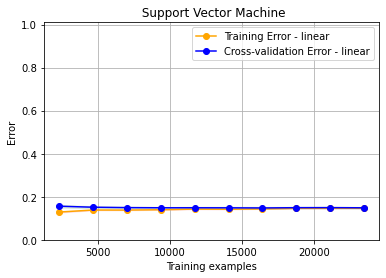

In [79]:

my_learn_curve(title=" Support Vector Machine", 
               estimator=census_pipeline_linear, 
               cv=stratified_kfold,
               X=X_c_train, 
               y=y_c_train,  
               label_suffix="linear", 
               color_=["orange","blue"],
               shape = 'o-'  )

plt.savefig("SVM_CENSUS_BASE_LEARNING_CURVE.pdf")


# my_learn_curve(title=" Support Vector Machine", 
#                estimator=census_pipeline_rbf, 
#                cv=stratified_kfold,
#                X=X_c_train, 
#                y=y_c_train,  
#                label_suffix="rbf", 
#                color_=["orange","blue"],
#                shape = 'x-'  )



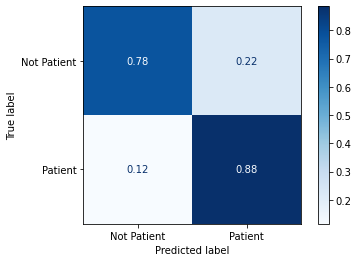

In [135]:
plot_confusion_matrix(estimator= census_pipeline_rbf.fit(X_c_train,y_c_train),
                      X=X_c_train,
                      y_true= y_c_train  , 
                      cmap=plt.cm.Blues,
                       normalize="true",
                      display_labels = ["Not Patient" ,"Patient"]
                        )

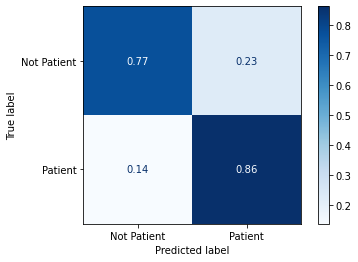

In [136]:
plot_confusion_matrix(estimator= census_pipeline_linear.fit(X_c_train,y_c_train),
                      X=X_c_train,
                      y_true= y_c_train  , 
                      cmap=plt.cm.Blues,
                       normalize="true",
                      display_labels = ["Not Patient" ,"Patient"]
                        )

## Complexity 


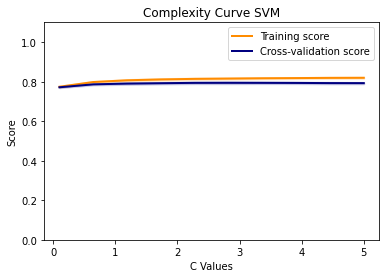

In [138]:
# cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=45)
train_scores, valid_scores = validation_curve(census_pipeline_rbf,
                                              X_c_train,
                                              y_c_train, 
                                              param_name =  "model__C",
                                            param_range = np.linspace(0.1,5,10),
                                            cv=cv)

param_range =  np.linspace(0.1,5,10)

train_scores_mean =  np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

plt.title("Complexity Curve SVM")
plt.xlabel("C Values")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
# semilogx
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")


plt.savefig("complexity_svc_C.png")
# plt.show()

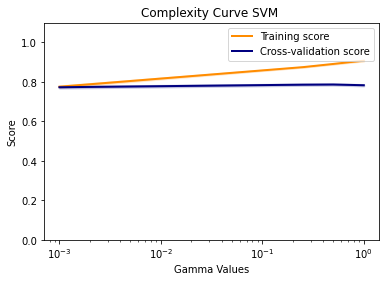

In [142]:
# cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=45)
train_scores, valid_scores = validation_curve(census_pipeline_rbf,
                                              X_c_train,
                                              y_c_train, 
                                              param_name =  "model__gamma",
                                            param_range = np.linspace(1e-3,1.,5),
                                            cv=cv)

param_range =  np.linspace(1e-3,1.,5)

train_scores_mean =  np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)


plt.title("Complexity Curve SVM ")
plt.xlabel("Gamma Values")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
# semilogx
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")


plt.savefig("complexity_svc_gamma.pdf")

# plt.show()

## Grid search CV 

In [88]:
# Set the parameters by cross-validation





tuned_parameters = [{'model__kernel': ['rbf'], 'model__gamma': np.linspace(1e-2,.1,5),
                     'model__C': [ 1,2,3 ], "model__class_weight":["balanced", None]},
                    {'model__kernel': ['model__linear'], 'model__C': [ 1,2,3 ]}]


# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=45)
# define the grid search procedure
grid_search = GridSearchCV(estimator=census_pipeline, param_grid=tuned_parameters, 
                           n_jobs=-1, cv=cv, 
                           scoring='average_precision')
# execute the grid search
grid_result = grid_search.fit(X_c_train, y_c_train)
# summarize the best score and configuration
print("Best: %f usin g %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [ ]:
# Best: 0.735783 usin g 
#     {'model__C': 1, 'model__class_weight': 'balanced', 'model__gamma': "scale", 'model__kernel': 'rbf'}

In [144]:
params = grid_result.cv_results_['params']

In [33]:
#         ('over', SMOTE()),
# Using pipeline
census_steps =[('encoding', OneHotEncoder(cols=categorical_columns)),
         ('imputer',SimpleImputer(missing_values=np.NaN, strategy='most_frequent')),
         ('scaler', StandardScaler()),
        ("model",  SVC( cache_size=10000, class_weight="balanced", gamma="scale", kernel="rbf", probability=True))]

census_pipeline = Pipeline(steps=census_steps)

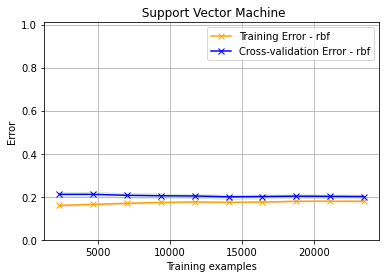

In [83]:
my_learn_curve(title=" Support Vector Machine - Final Model", 
               estimator=census_pipeline.fit(X_c_train,y_c_train), 
               cv=stratified_kfold,
               X=X_c_train, 
               y=y_c_train,  
               label_suffix="rbf", 
               color_=["orange","blue"],
               shape = 'x-'  )

plt.savefig("SVM_CENSUS_final_learning_curve.pdf")


In [30]:

print(average_precision_score(y_c_train, census_pipeline.fit(X_c_train, y_c_train).predict_proba(X_c_train)[:,1]))


/home/flufylobster/anaconda3/envs/ML39/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.7823416538237339


NameError: name 'y_c_test' is not defined

In [34]:
print(average_precision_score(y_c_test, census_pipeline.fit(X_c_train, y_c_train).predict_proba(X_c_test)[:,1]))

/home/flufylobster/anaconda3/envs/ML39/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.7479314579426083


In [87]:
X_c_test = test_data.drop('income', axis=1)
y_c_test = test_data['income']
print(classification_report(y_c_train, census_pipeline.fit(X_c_train,y_c_train).predict(X_c_train) ))
print(classification_report(y_c_test, census_pipeline.fit(X_c_train,y_c_train).predict(X_c_test) ))

              precision    recall  f1-score   support

          -1       0.96      0.80      0.87     19758
           1       0.58      0.89      0.70      6271

    accuracy                           0.82     26029
   macro avg       0.77      0.84      0.79     26029
weighted avg       0.87      0.82      0.83     26029

              precision    recall  f1-score   support

          -1       0.94      0.79      0.86      4940
           1       0.55      0.84      0.67      1568

    accuracy                           0.80      6508
   macro avg       0.75      0.81      0.76      6508
weighted avg       0.85      0.80      0.81      6508



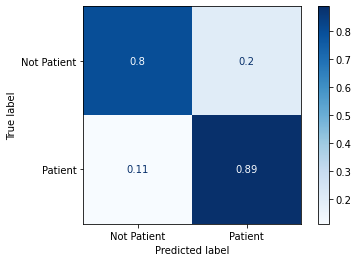

In [90]:
plot_confusion_matrix(estimator=  census_pipeline.fit(X_c_train,y_c_train) ,
                      X=X_c_train,
                      y_true= y_c_train  , 
                      cmap=plt.cm.Blues,
                       normalize="true",
                      display_labels = ["Not Patient" ,"Patient"]
                        )